# EDA
## MovieViewing

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats 
k_movie=pd.read_csv('..\\dataPreprocessing\\k_movie_2.csv')
k_movie

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"['이언픽쳐스', '(주)그란']",20171207,개봉영화,장편,한국,71.0,284.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.0
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",['커넥트픽쳐스(주)'],20190516,개봉영화,장편,한국,200.0,154.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,5,1,0.0
2,기생충,봉준호,(주)바른손이앤에이,['(주)씨제이이엔엠'],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49,2019,5,1,1.0
3,이타미 준의 바다,정다운,기린그림,['(주)영화사 진진'],20190815,개봉영화,장편,한국,57.0,144.0,144.0,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,8,1,0.0
4,벌새,김보라,에피파니(주),"['(주)엣나인필름', '(주)콘텐츠판다']",20190829,개봉영화,장편,한국,145.0,2721.0,2082.0,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,8,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2차 송환,김동원,푸른영상,['(주)시네마달'],2022-09-,개봉영화,장편,한국,16.0,415.0,373.0,다큐멘터리,12세이상관람가,독립/예술영화,8.20,6.44,2022,9,1,0.0
354,EBS친구들 씽씽 댄스파티,감독명 누락,한국교육방송공사 EBS,['(주)에픽캔'],2022-09-,개봉영화,장편,한국,1.0,60.0,22.0,가족,전체관람가,일반영화,5.59,7.44,2022,9,1,0.0
355,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,['주식회사 씨엠닉스'],2022-09-,개봉영화,장편,한국,9.0,395.0,250.0,미스터리,15세이상관람가,독립/예술영화,5.59,7.47,2022,9,1,0.0
356,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,['(주)트리플픽쳐스'],2022-09-,개봉영화,장편,한국,6.0,662.0,336.0,액션,12세이상관람가,독립/예술영화,5.59,8.84,2022,9,1,0.0


In [17]:
k_movie['MOVIE_SDIV_NM'].value_counts().sort_index()

독립/예술영화    240
일반영화       118
Name: MOVIE_SDIV_NM, dtype: int64

In [18]:
k_movie['MOVIE_SDIV_NM']

0      독립/예술영화
1      독립/예술영화
2         일반영화
3      독립/예술영화
4      독립/예술영화
        ...   
353    독립/예술영화
354       일반영화
355    독립/예술영화
356    독립/예술영화
357    독립/예술영화
Name: MOVIE_SDIV_NM, Length: 358, dtype: object

In [24]:
k_movie['GENRE_NM'].values().categories()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
k_genre = k_movie['GENRE_NM'].value_counts().sort_index()

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from c

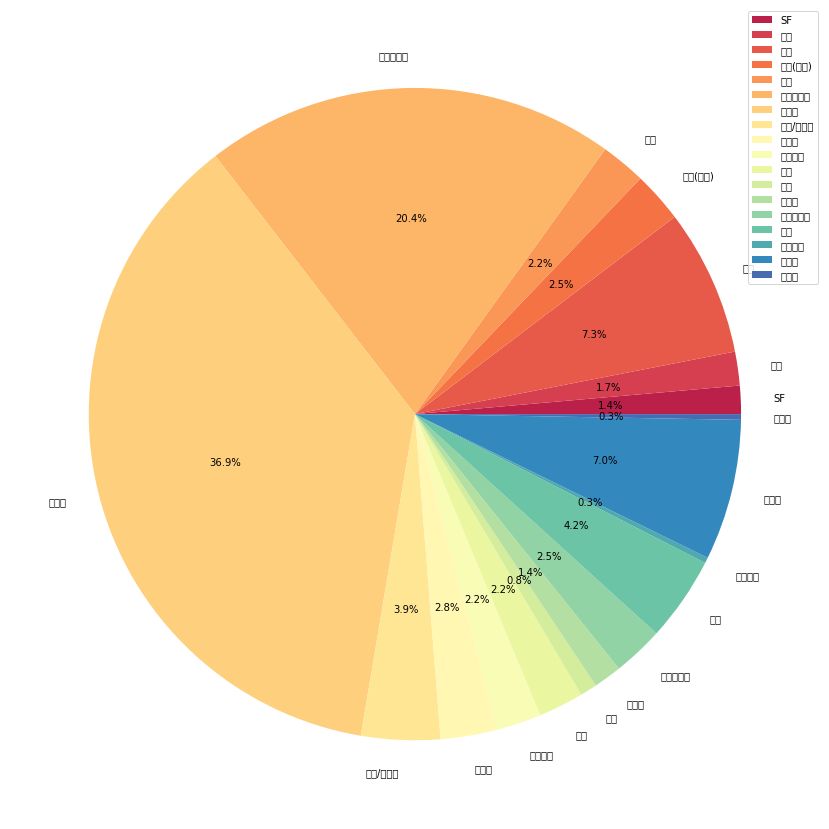

In [ ]:
import matplotlib.pyplot as plt
color = sns.color_palette('Spectral', len(k_genre.index))

fig, ax = plt.subplots(figsize=(20,15))
plt.pie(k_genre, labels = k_genre.index, autopct='%.1f%%', colors=color)
plt.legend()
plt.show()

In [25]:
k_movie = k_movie.astype({'MOVIE_TY_NM':'category', 'MOVIE_STLE_NM':'category', 'GENRE_NM':'category', 'GRAD_NM':'category', 'MOVIE_SDIV_NM':'category',
                         'SUCCESS':'category', 'YEAR':'category', 'MONTH':'category'})
k_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MOVIE_NM              358 non-null    object  
 1   DRCTR_NM              358 non-null    object  
 2   MAKR_NM               358 non-null    object  
 3   DISTB_CMPNY_NM        358 non-null    object  
 4   OPN_DE                358 non-null    object  
 5   MOVIE_TY_NM           358 non-null    category
 6   MOVIE_STLE_NM         358 non-null    category
 7   NLTY_NM               358 non-null    object  
 8   TOT_SCRN_CO           358 non-null    float64 
 9   VIEWNG_NMPR_CO        358 non-null    float64 
 10  SEOUL_VIEWNG_NMPR_CO  358 non-null    float64 
 11  GENRE_NM              358 non-null    category
 12  GRAD_NM               358 non-null    category
 13  MOVIE_SDIV_NM         358 non-null    category
 14  CRITIC_RT             358 non-null    float64 
 15  VIEWER

<AxesSubplot:>

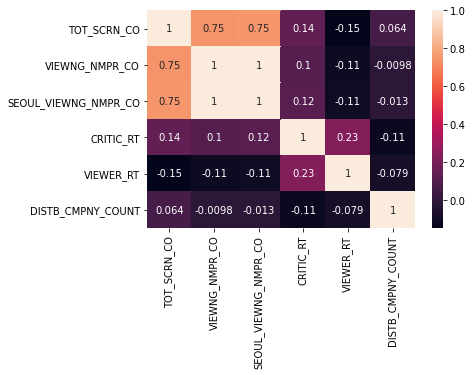

In [26]:
corr = k_movie.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2g')

c:\Users\gus10\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\gus10\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\gus10\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\gus10\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\gus10\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\gus10\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\gus10\anaconda3\lib

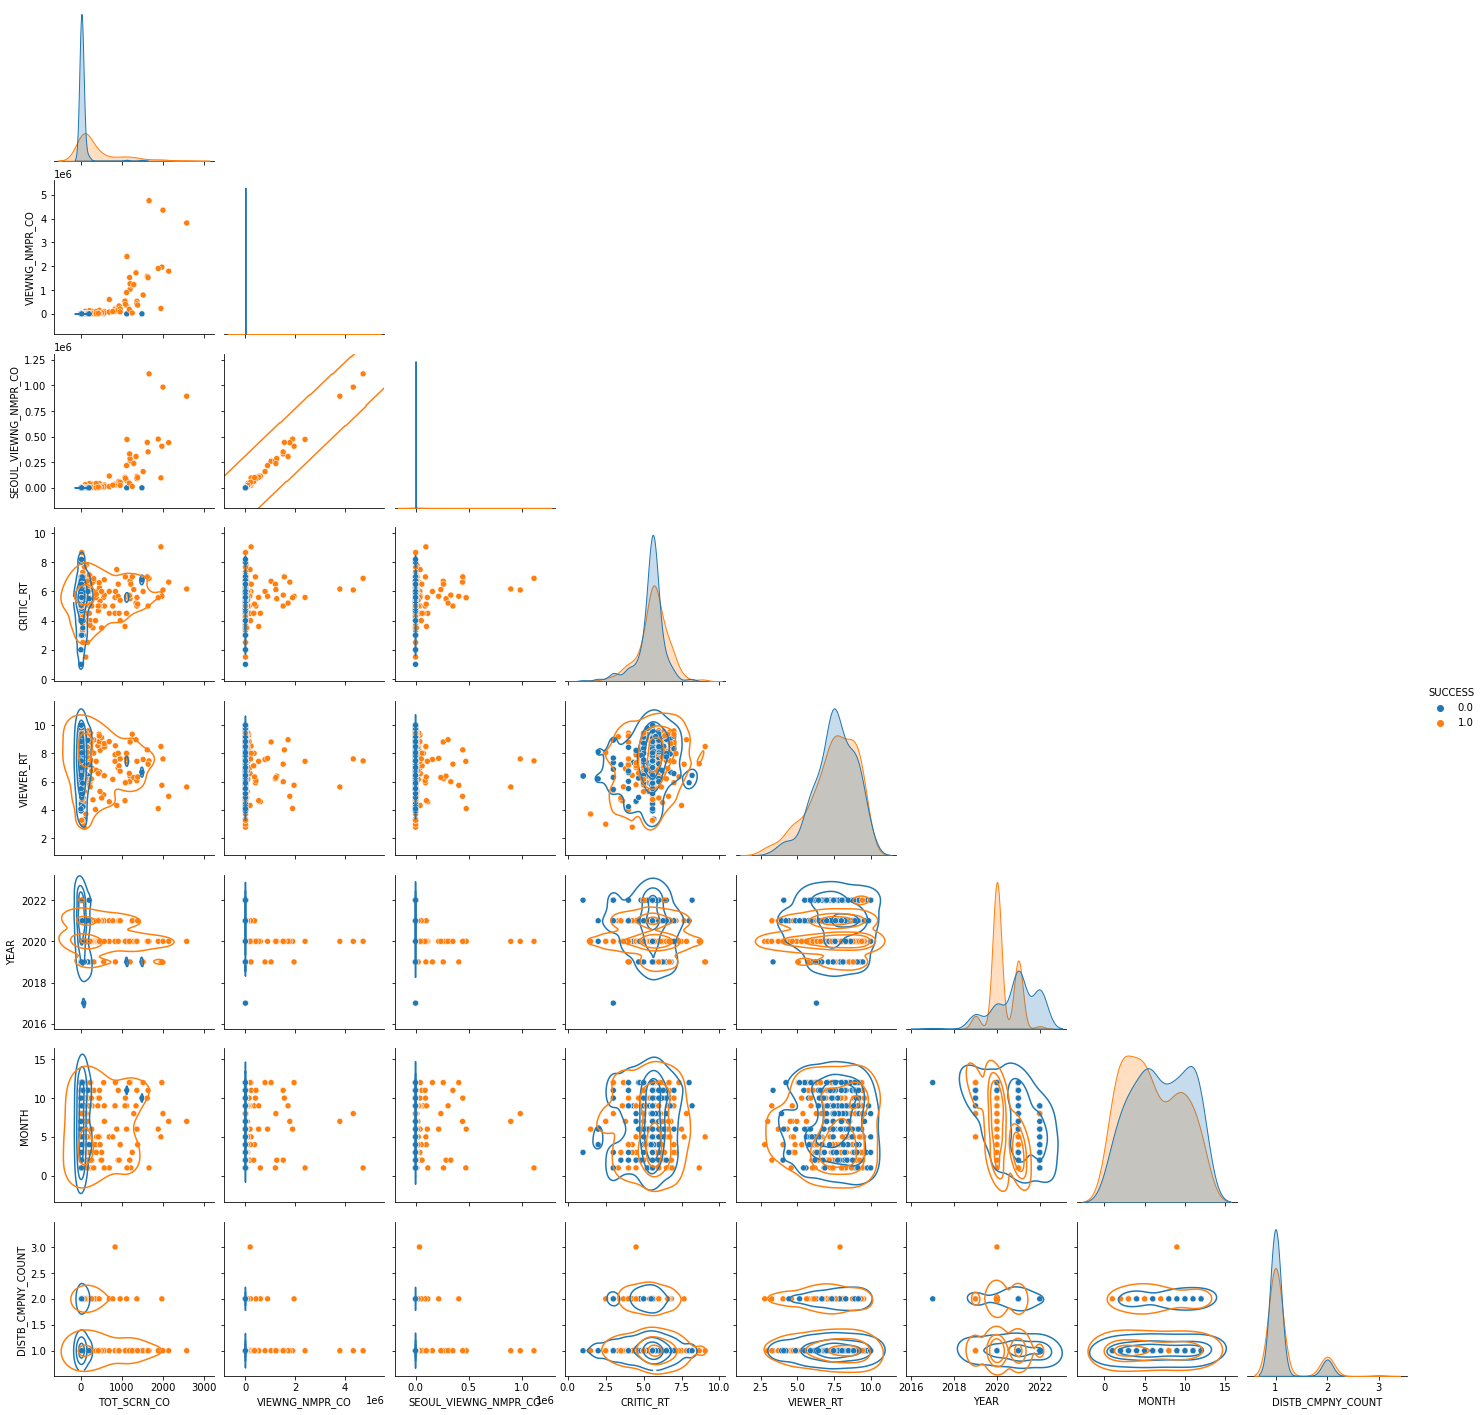

In [ ]:
p = sns.pairplot(k_movie, hue = "SUCCESS", corner = True)
p.map_lower(sns.kdeplot, levels=4, color=".2")

Text(0.5, 0, 'SEOUL_VIEWING_NMPR_CO')

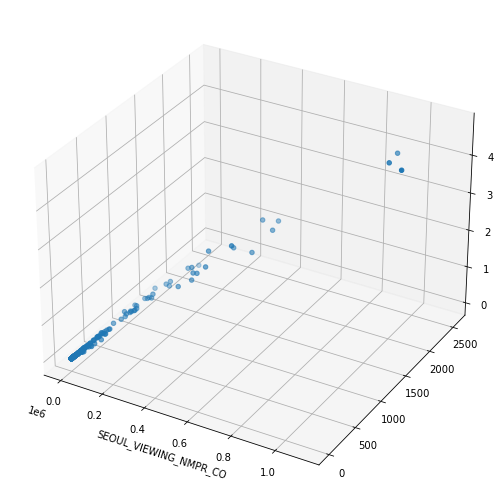

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(k_movie['SEOUL_VIEWNG_NMPR_CO'], k_movie['TOT_SCRN_CO'], k_movie['VIEWNG_NMPR_CO'])
ax.set_xlabel('SEOUL_VIEWING_NMPR_CO')

In [ ]:
#총 스크린 수와 서울 관람객 수 사이 상관관계 높음
#따라서, feature extraction - PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
k_movie_cols_scaled = scaler.fit_transform(k_movie[['TOT_SCRN_CO', 'SEOUL_VIEWNG_NMPR_CO']])

pca = PCA(n_components=1)
pca.fit(k_movie_cols_scaled)
print(pca.explained_variance_ratio_)

[0.87531453]


In [22]:
k_movie_pca = pca.transform(k_movie_cols_scaled)
k_movie_pca

array([[-4.03496144e-01],
       [-1.87389405e-01],
       [ 3.36212191e+00],
       [-4.27916927e-01],
       [-2.67773800e-01],
       [-2.60059727e-01],
       [-3.17510679e-01],
       [ 1.97533148e+00],
       [ 1.35672090e+00],
       [-3.82740463e-01],
       [-2.35338975e-01],
       [ 2.87315687e-02],
       [-3.71500353e-01],
       [-4.08955140e-01],
       [-5.17580048e-01],
       [-3.86687367e-01],
       [-3.78799836e-01],
       [-4.94149041e-01],
       [ 4.46470340e-01],
       [-5.12886845e-01],
       [-5.12792690e-01],
       [-4.93654484e-01],
       [-4.80723565e-01],
       [ 3.02024375e+00],
       [-5.20886698e-01],
       [ 5.34194648e+00],
       [ 1.05203026e+00],
       [-5.16256265e-01],
       [-4.87267819e-01],
       [ 3.12386122e+00],
       [-5.22518054e-01],
       [-5.12465623e-01],
       [-4.34435054e-01],
       [-8.83094169e-02],
       [ 3.17061918e+00],
       [-4.34153608e-01],
       [-5.15791767e-01],
       [ 9.25387680e+00],
       [ 1.3

(array([59., 33., 26., 40., 33., 18., 26., 31., 27., 65.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

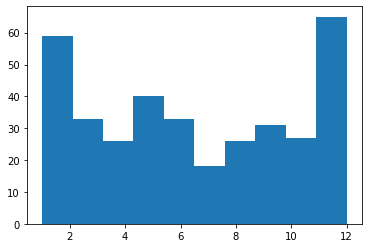

In [68]:
plt.hist(k_movie['MONTH'])

AxesSubplot(0.125,0.125;0.775x0.755)


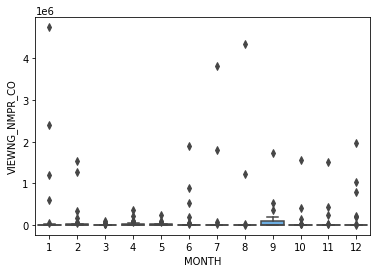

In [72]:
import seaborn as sns
print(sns.boxplot(data=k_movie, x='MONTH', y='VIEWNG_NMPR_CO'))


AxesSubplot(0.125,0.125;0.775x0.755)


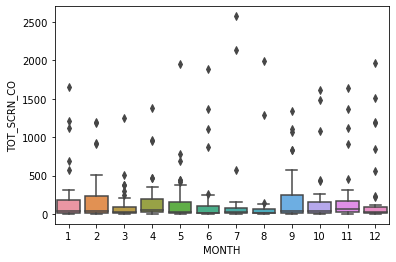

In [73]:
print(sns.boxplot(data=k_movie, x='MONTH', y='TOT_SCRN_CO'))